In [18]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

Reading in "objects" csv file: Claim 1.

Claim 1: There is a strong positive relationship between the number of new companies in a particular field and among the growth of the field.

In [19]:
objects = pd.read_csv("objects_required_fields_only.csv")

#Data cleaning
duplicate_rows_obj = objects[objects.duplicated()]
objects = objects.dropna(axis=0, subset=['category_code'])
objects['year'] = pd.DatetimeIndex(objects['founded_at']).year

#filtering df by year range
obj_filtered = objects[objects['year'] >= 2009][objects['year'] <= 2011]
obj_filtered1 = objects[objects['year'] >= 2012][objects['year'] <= 2013]

# range of year 2009 - 2013
range09 = objects[objects['year'] == 2009]
range10 = objects[objects['year'] == 2010]
range11 = objects[objects['year'] == 2011]
range12 = objects[objects['year'] == 2012]
range13 = objects[objects['year'] == 2013]


C:\Users\Pain\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3,7,9,10,13,14,15,17,18,21,22,29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
<ipython-input-19-d52900d4dec5>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  obj_filtered = objects[objects['year'] >= 2009][objects['year'] <= 2011]
<ipython-input-19-d52900d4dec5>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  obj_filtered1 = objects[objects['year'] >= 2012][objects['year'] <= 2013]


In [20]:
#Showing number of new companies by category
print("\nNew company categories from 2009-2011:")

dfGR09 = pd.DataFrame(columns=['Category', '2009'])
dfGR10 = pd.DataFrame(columns=['2010'])
dfGR11 = pd.DataFrame(columns=['2011'])
dfGr = pd.DataFrame(columns=['AGR'])

#creating 3 df's
for cat, cnt in range09.category_code.value_counts().iteritems():
    dfGR09 = dfGR09.append({'Category': cat, '2009': cnt}, ignore_index=True)
for cat, cnt in range10.category_code.value_counts().iteritems():
    dfGR10 = dfGR10.append({'2010': cnt}, ignore_index=True)
for cat, cnt in range11.category_code.value_counts().iteritems():
    dfGR11 = dfGR11.append({'2011': cnt}, ignore_index=True)
    
#appending to main df which is dfGR09
dfGR09 = dfGR09.append([dfGR10, dfGR11])

#dropping null values
dfGR09['Category'] = dfGR09['Category'].dropna().reset_index(drop=True)
dfGR09['2009'] = dfGR09['2009'].dropna().reset_index(drop=True)
dfGR09['2010'] = dfGR09['2010'].dropna().reset_index(drop=True)
dfGR09['2011'] = dfGR09['2011'].dropna().reset_index(drop=True)

#calculating and appending growth rate for each category
for i, row in dfGR09.iterrows():
    gr1 = (((row['2010'] - row['2009']) / row['2009']) * 100) 
    gr2 = (((row['2011'] - row['2010']) / row['2010']) * 100)
    agr = (gr1 + gr2) / 2
    dfGr = dfGr.append({'AGR': agr}, ignore_index=True)

#appending to main df
dfGR09 = dfGR09.append([dfGr])

#dropping null values
dfGR09['Category'] = dfGR09['Category'].dropna().reset_index(drop=True)
dfGR09['2009'] = dfGR09['2009'].dropna().reset_index(drop=True)
dfGR09['2010'] = dfGR09['2010'].dropna().reset_index(drop=True)
dfGR09['2011'] = dfGR09['2011'].dropna().reset_index(drop=True)
dfGR09['AGR'] = dfGR09['AGR'].dropna().reset_index(drop=True)

dfGR09.drop_duplicates(subset=['Category'])

dfGR09.head(42)




New company categories from 2009-2011:


,Category,2009,2010,2011,AGR
0,web,1526,1670,1835,9.658337
1,software,1367,1409,1570,7.249483
2,other,770,951,1155,22.478799
3,ecommerce,746,850,951,12.911686
4,games_video,609,733,896,21.299314
5,advertising,604,667,668,5.290194
6,mobile,529,640,591,6.663368
7,consulting,392,394,442,6.346473
8,enterprise,340,360,305,-4.697712
9,public_relations,219,233,295,16.501068


In [31]:
#Number of new companies distributed by category each year
print("Number of unique(categorized) companies established per year")
print("2009: ", dfGR09['2009'].sum())
print("2010: ", dfGR09['2010'].sum())
print("2011: ", dfGR09['2011'].sum())
print("\nGrowth Rate 2009-2010:", ((dfGR09['2010'].sum() - dfGR09['2009'].sum()) / dfGR09['2009'].sum()) * 100)
print("Growth Rate 2010-2011:", ((dfGR09['2011'].sum() - dfGR09['2010'].sum()) / dfGR09['2010'].sum()) * 100)

Number of unique(categorized) companies established per year
2009:  52800
2010:  60066
2011:  66060

Growth Rate 2009-2010: 13.761363636363635
Growth Rate 2010-2011: 9.97902307461792


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.,
        1800.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

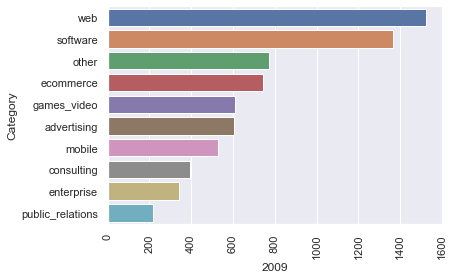

In [22]:
#Plotted number of new company categories 2009
plot09 = sns.barplot(x="2009", y="Category", data=dfGR09.head(10))
plt.xticks(rotation = 90)

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

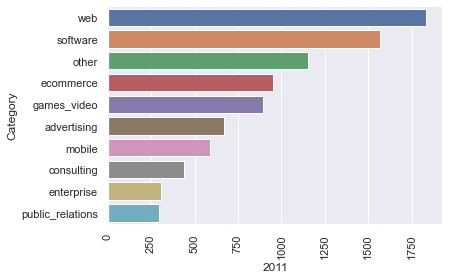

In [23]:
#Plotted number of new company categories 2011
plot11 = sns.barplot(x="2011", y="Category", data=dfGR09.head(10))
plt.xticks(rotation = 90)

In [24]:

# Funds per year by category
funds09 = range09.groupby(['category_code'])['funding_total_usd'].sum().sort_values(ascending=False)
funds10 = range10.groupby(['category_code'])['funding_total_usd'].sum().sort_values(ascending=False)
funds11 = range11.groupby(['category_code'])['funding_total_usd'].sum().sort_values(ascending=False)
funds12 = range12.groupby(['category_code'])['funding_total_usd'].sum().sort_values(ascending=False)
funds13 = range13.groupby(['category_code'])['funding_total_usd'].sum().sort_values(ascending=False)

In [25]:
funds = [funds09,funds10,funds11,funds12,funds13]
GR0910 = pd.DataFrame(columns=['GR0910'])
GR1011 = pd.DataFrame(columns=['GR1011'])
GR1112 = pd.DataFrame(columns=['GR1112'])
GR1213 = pd.DataFrame(columns=['GR1213'])
AAGR = pd.DataFrame(columns=['AAGR'])

for ind1 in range(len(funds)):
    for i in range(len(funds13.index)-1):
        if(ind1 == 0):
            GR0910 = GR0910.append({'GR0910': (((funds[ind1+1][funds[4].index[i]] - funds[ind1][funds[4].index[i]])/funds[ind1][funds[4].index[i]])*100)},ignore_index=True) #GR0910
            GR1011 = GR1011.append({'GR1011': (((funds[ind1+2][funds[4].index[i]] - funds[ind1+1][funds[4].index[i]])/funds[ind1+1][funds[4].index[i]])*100)},ignore_index=True) #GR1011
            GR1112 = GR1112.append({'GR1112': (((funds[ind1+3][funds[4].index[i]] - funds[ind1+2][funds[4].index[i]])/funds[ind1+2][funds[4].index[i]])*100)},ignore_index=True)#GR1112
            GR1213 = GR1213.append({'GR1213': (((funds[ind1+4][funds[4].index[i]] - funds[ind1+3][funds[4].index[i]])/funds[ind1+3][funds[4].index[i]])*100)},ignore_index=True) #GR1213
        else:
            break

<ipython-input-25-a82adb980cd7>:11: RuntimeWarning: divide by zero encountered in longlong_scalars
  GR0910 = GR0910.append({'GR0910': (((funds[ind1+1][funds[4].index[i]] - funds[ind1][funds[4].index[i]])/funds[ind1][funds[4].index[i]])*100)},ignore_index=True) #GR0910


In [26]:
for j in range(len(funds13.index)-1):
    AAGR = AAGR.append({'AAGR': ((GR0910._get_value(j,'GR0910')+GR1011._get_value(j,'GR1011')+GR1112._get_value(j,'GR1112')+GR1213._get_value(j,'GR1213'))/4 )},ignore_index=True)              

In [27]:
funds09 = funds09.to_frame()
funds10 = funds10.to_frame()
funds11 = funds11.to_frame()
funds12 = funds12.to_frame()
funds13 = funds13.to_frame()

In [28]:
funds13 = funds13.append([GR0910,GR1011,GR1112,GR1213,AAGR])

In [29]:
funds13 = funds13.reset_index()
funds13['GR0910'] = funds13['GR0910'].dropna().reset_index(drop=True)
funds13['GR1011'] = funds13['GR1011'].dropna().reset_index(drop=True)
funds13['GR1112'] = funds13['GR1112'].dropna().reset_index(drop=True)
funds13['GR1213'] = funds13['GR1213'].dropna().reset_index(drop=True)
funds13['AAGR'] = funds13['AAGR'].dropna().reset_index(drop=True)
funds13.head(42)

,index,funding_total_usd,GR0910,GR1011,GR1112,GR1213,AAGR
0,games_video,333695107.0,10.489090,-24.905479,-73.609400,134.238182,11.553098
1,mobile,319926220.0,2.930874,-38.892809,-45.719381,-28.811388,-27.623176
2,enterprise,308732314.0,-39.119222,-31.422386,-65.894664,7.656502,-32.194943
3,biotech,215828033.0,-2.976103,-32.470405,-50.423010,-66.905369,-38.193722
4,software,115733699.0,-11.871371,-33.526787,-50.297683,-75.272698,-42.742135
5,cleantech,100420000.0,-61.620680,-37.162007,-51.195388,-26.724238,-44.175578
6,ecommerce,99456263.0,14.529486,-33.596579,8.716142,-91.522409,-25.468340
7,web,86869934.0,-28.651646,-23.093631,-62.835342,-66.260066,-45.210171
8,music,61879913.0,-87.161093,31.098167,-75.771030,500.015117,92.045290
9,hardware,60779044.0,201.344502,-64.788355,2.374905,-78.395139,15.133978


In [13]:

'''Claim 1 Conclusion:

Number of new companies(categorized):
2009:  52800
2010:  60066
2011:  66060

#Growth rate of the number of new companies: 
2009-2010: ~13.7%
2010-2011: ~9.97%

Claim 1 Conclusion:
Based on the data i've gathered, It seems that there is a strong relationship between the growth rate of new companies and 
the growth rate of investment. The top ranking category in terms of investment is "Video Games" and because the rate 
of new companies in 2009-2011 for "Video Games" is a positive 20% which is good compared to other categories around it.

'''


"Claim 1 Conclusion:\n\nNumber of new companies(categorized):\n2011.0    11010\n2010.0    10011\n2009.0     8800\n\n#Growth rate of the number of new companaies: \n2009-2010: ~13.7%\n2010-2011: ~9.97%\nAverage growth rate of investment per each top ranking category for 2012-2013 is ~-17.7% (#Recalculate Average growth rate)\n\nClaim 1 isn't true since the rate of new companies from 2010-2011 compared to 2009-2010, increases slightly and \nthe average growth rate of investement decreases in the years 2012-2013 compared to previos years. It seems that there \nisn't a positive relationship since even if there was a slight increase in number of new companies we should still see \na slight increase in investment. "

In [14]:
'''Claim 2 Conclusion: 
 Average investment from 2012-2013 is $2,820,462,013,279.0 
 Annual growth investment rate from 2010-2013 is 5.7%.
 Number of investments from 2010-2013 is 877
 Claim 2 is true as the average annual growth rate is a positive ~5.7% and the number of investements increases each year.
'''

'Claim 2 Conclusion: \n Average investment from 2012-2013 is $2,820,462,013,279.0 \n Annual growth investment rate from 2010-2013 is 5.7%.\n Number of investments from 2010-2013 is 877\n Claim 2 is true as the average annual growth rate is a positive ~5.7% and the number of investements increases each year.\n'

In [15]:
'''Claim 5 conclusion:
Based on the data provided through 2012-2013 theres a significant increase in funds of ~40%. Compared to previous years this is 
a significant increase. Based on the market growth rate from the current market size (2013) and the original market size (2012)
we find that its 41.672%. We compare this to the fund growth rate of 2012 and 2013 which is 41.672%, we can then assume that
the market is preforming well.
Formula use for this conclusion: Market Growth Rate=(Current market size-Original market size)/(Original market size)
'''

'Claim 5 conclusion:\nBased on the data provided through 2012-2013 theres a significant increase in funds of ~40%. Compared to previous years this is \na significant increase. Based on the market growth rate from the current market size (2013) and the original market size (2012)\nwe find that its 41.672%. We compare this to the fund growth rate of 2012 and 2013 which is 41.672%, we can then assume that\nthe market is preforming well.\nFormula use for this conclusion: Market Growth Rate=(Current market size-Original market size)/(Original market size)\n'